## Goal of this Notebook
We want to look observe the conditional probability of a week's movement given the previous two weeks.

For the same reasons as stated in the previous notebook, we will be using the four movement categories instead of the eight.

#### "Big" in our context is anything outside a standard deviation
#### Now lets see if the macro reflects the micro

In [1]:
from stock_utils import *

In [2]:
df = pd.DataFrame()
df = df.from_csv('nvda.csv')
weekly_movements = get_price_movements(df, period=7)

In [3]:
movement_categories = categorize_movements(weekly_movements, n_cats=4)

In [4]:
movement_categories[1:10]

['bd', 'bg', 'sd', 'sg', 'sg', 'sd', 'bd', 'bd', 'sg']

In [5]:
bd_count = count_movement_category(movement_categories, 'bd')
sd_count = count_movement_category(movement_categories, 'sd')
sg_count = count_movement_category(movement_categories, 'sg')
bg_count = count_movement_category(movement_categories, 'bg')

total_cat_count = len(movement_categories)

p_bd = bd_count / total_cat_count
p_sd = sd_count / total_cat_count
p_sg = sg_count / total_cat_count
p_bg = bg_count / total_cat_count

cat_counts = [bd_count, sd_count, sg_count, bg_count]
cat_probs = [p_bd, p_sd, p_sg, p_bg]

In [6]:
[print(i) for i in cat_probs]

0.125
0.40555555555555556
0.3611111111111111
0.10833333333333334


[None, None, None, None]

In [7]:
def get_three_week_trends(movement_categories):
	three_week_trends = []
	for i in range(len(movement_categories) - 2):
		three_week_trends.append(movement_categories[i] + '_' + movement_categories[i+1] + '_' + movement_categories[i+2])
	return three_week_trends

In [8]:
three_week_trends = get_three_week_trends(movement_categories)

In [9]:
three_week_trends[1:10]

['bd_bg_sd',
 'bg_sd_sg',
 'sd_sg_sg',
 'sg_sg_sd',
 'sg_sd_bd',
 'sd_bd_bd',
 'bd_bd_sg',
 'bd_sg_sg',
 'sg_sg_sg']

Let's check to make sure there are len(movement_categories) - 2 three_week_trends.  
Let's also have a look at the number of times different trends appear

In [10]:
total = 0
all_categories = ['bd', 'sd', 'sg', 'bg']

for first_category in all_categories:
    for second_category in all_categories:
        for third_category in all_categories:
            trend_name = first_category + '_' + second_category + '_' + third_category
            three_week_trend_count = count_trends(three_week_trends, trend_name)
            print('The count for ' + trend_name + ' is: ' + str(three_week_trend_count))
            total += three_week_trend_count

print('The total is: ' + str(total))

The count for bd_bd_bd is: 1
The count for bd_bd_sd is: 2
The count for bd_bd_sg is: 4
The count for bd_bd_bg is: 3
The count for bd_sd_bd is: 3
The count for bd_sd_sd is: 2
The count for bd_sd_sg is: 6
The count for bd_sd_bg is: 2
The count for bd_sg_bd is: 1
The count for bd_sg_sd is: 9
The count for bd_sg_sg is: 2
The count for bd_sg_bg is: 1
The count for bd_bg_bd is: 3
The count for bd_bg_sd is: 2
The count for bd_bg_sg is: 2
The count for bd_bg_bg is: 2
The count for sd_bd_bd is: 5
The count for sd_bd_sd is: 3
The count for sd_bd_sg is: 3
The count for sd_bd_bg is: 1
The count for sd_sd_bd is: 5
The count for sd_sd_sd is: 29
The count for sd_sd_sg is: 19
The count for sd_sd_bg is: 6
The count for sd_sg_bd is: 5
The count for sd_sg_sd is: 27
The count for sd_sg_sg is: 21
The count for sd_sg_bg is: 5
The count for sd_bg_bd is: 1
The count for sd_bg_sd is: 6
The count for sd_bg_sg is: 7
The count for sd_bg_bg is: 1
The count for sg_bd_bd is: 2
The count for sg_bd_sd is: 4
The count 

## Two week trends and bar graphs
It's helpful to assess whether looking back an extra time step is worth it

In [11]:
two_week_trends = get_two_day_trends(movement_categories)
two_week_trends[1:10]

['bd_bg',
 'bg_sd',
 'sd_sg',
 'sg_sg',
 'sg_sd',
 'sd_bd',
 'bd_bd',
 'bd_sg',
 'sg_sg']

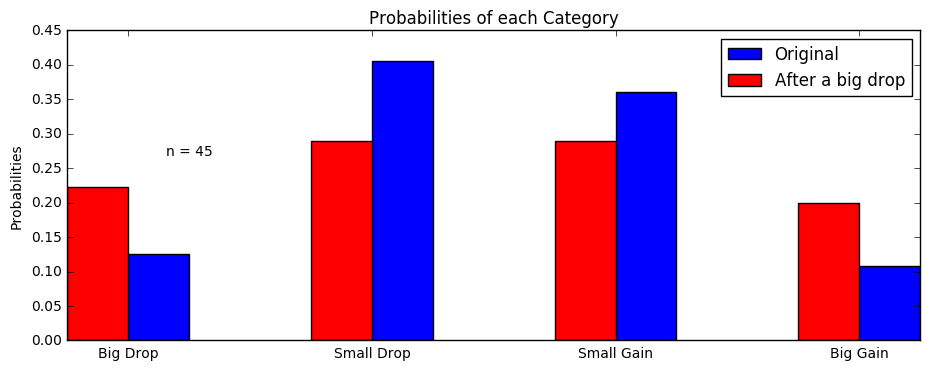

In [12]:
plot_two_day_probability_bar_graph('bd', bd_count, two_week_trends, cat_probs, n_cats=4)
plt.show()

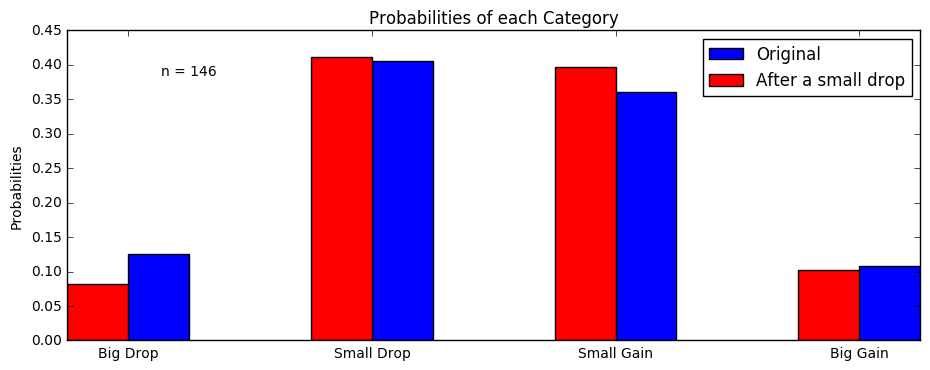

In [15]:
plot_two_day_probability_bar_graph('sd', sd_count, two_week_trends, cat_probs, n_cats=4)
plt.show()

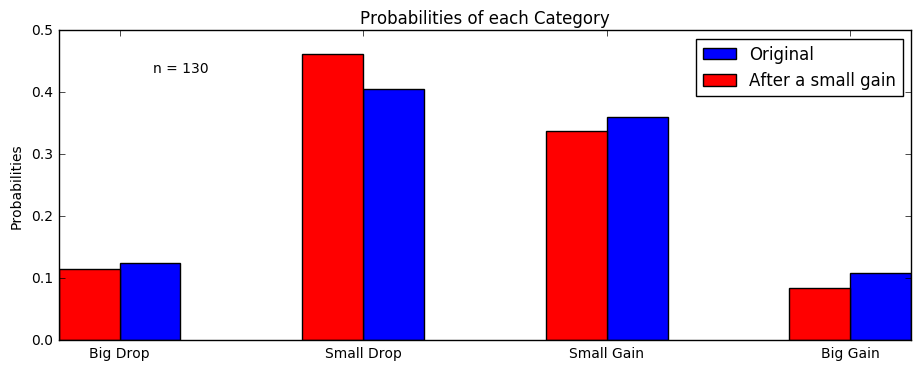

In [16]:
plot_two_day_probability_bar_graph('sg', sg_count, two_week_trends, cat_probs, n_cats=4)
plt.show()

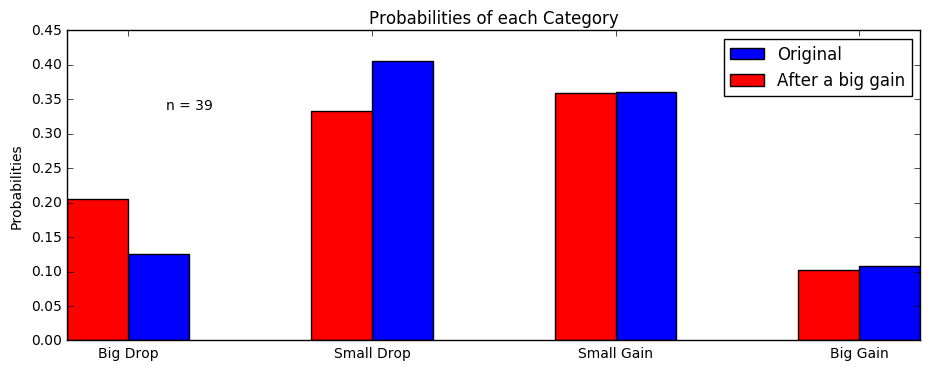

In [18]:
plot_two_day_probability_bar_graph('bg', bg_count, two_week_trends, cat_probs, n_cats=4)
plt.show()

In [19]:
def get_category_probabilities(movement_categories, n_categories=4):
    bd_count = count_movement_category(movement_categories, 'bd')
    sd_count = count_movement_category(movement_categories, 'sd')
    sg_count = count_movement_category(movement_categories, 'sg')
    bg_count = count_movement_category(movement_categories, 'bg')

    total_cat_count = len(movement_categories)

    p_bd = bd_count / total_cat_count
    p_sd = sd_count / total_cat_count
    p_sg = sg_count / total_cat_count
    p_bg = bg_count / total_cat_count

    category_counts = [bd_count, sd_count, sg_count, bg_count]
    category_probabilities = [p_bd, p_sd, p_sg, p_bg]
    
    return category_probabilities

In [20]:
def plot_three_day_probability_bar_graph(previous_day, two_day_trends, three_day_trends):
	import matplotlib.patches as mpatches
	two_day_probs = []
	three_day_probs = []
	all_categories = ['bd', 'sd', 'sg', 'bg']
	count = count_movement_category(movement_categories, previous_day)

    ## Get probabilities after 'previous_day'
	for next_day in all_categories:
		two_day_name = previous_day +'_' + next_day
		two_day_count = count_trends(two_day_trends, two_day_name)
		two_day_prob = two_day_count / count
		two_day_probs.append(two_day_prob)
    
    ## Get probabilities after 'previous_day' and the day before
	for next_day in all_categories:
		for day_before_last in all_categories:  
			three_day_name = day_before_last +'_' + previous_day +'_' + next_day
			three_day_count = count_trends(three_day_trends, three_day_name)

			two_day_name = day_before_last +'_' + previous_day
			############## TEMPORARY -- think of a more elegant solution
			three_day_total = 0
			for category in all_categories:
				three_day_total += count_trends(three_day_trends, two_day_name + '_' + category)

			three_day_prob = three_day_count / three_day_total
			three_day_probs.append(three_day_prob)
			#print('Number of times ' + three_day_name + ' appeared is: ' + str(three_day_count))

	fig = plt.figure(figsize=(11,4))
	ax = fig.add_axes([0.1, 0.1, 0.8, 0.9])
	categories = ('Big Drop', 'Small Drop', 'Small Gain', 'Big Gain')
	ind = np.arange(4)
	width = 0.1

    ## Plot three day probabilities
	for i in range(int(len(three_day_probs) / 4)):
		pl = ax.bar(ind[i] + 1 * width, three_day_probs[i * 4], width, color='red')
		pl = ax.bar(ind[i] + 2 * width, three_day_probs[i * 4 + 1], width, color='orange')
		pl = ax.bar(ind[i] + 3 * width, three_day_probs[i * 4 + 2], width, color='#ebfaeb')
		pl = ax.bar(ind[i] + 4 * width, three_day_probs[i * 4 + 3], width, color='#6efa70')

    ## Plot two day probability 
	conditioned_pl = ax.bar(ind + (5 * width), two_day_probs, width * 1.5, color='blue')
	orig_pl = ax.bar(ind + (6.5 * width), category_probabilities, width * 1.5, color='black')
        
	labels = ['Original',
              'After a ' + category_full_names[previous_day], 
              'After a big drop, then a ' + category_full_names[previous_day],
              'After a small drop, then a ' + category_full_names[previous_day], 
              'After a small gain, then a ' + category_full_names[previous_day], 
              'After a big gain, then a ' + category_full_names[previous_day]]
	original_patch = mpatches.Patch(color='black')
	two_day_patch = mpatches.Patch(color='blue')
	bd_x_patch = mpatches.Patch(color='red')
	sd_x_patch = mpatches.Patch(color='orange')
	sg_x_patch = mpatches.Patch(color='#ebfaeb')
	bg_x_patch = mpatches.Patch(color='#6efa70')
	fig.legend([original_patch, two_day_patch, bd_x_patch, sd_x_patch, sg_x_patch, bg_x_patch], labels, 'upper right')

	plt.ylabel('Probabilities')
	plt.title('Probabilities of each Category')
	plt.xticks(ind + 4.5 * width, categories)

In [21]:
category_probabilities = get_category_probabilities(movement_categories)

### The skinny bars give the added context of looking an extra week back
#### The blue bar is the conditional probability of looking back one week. The black bar is the probability on any given day

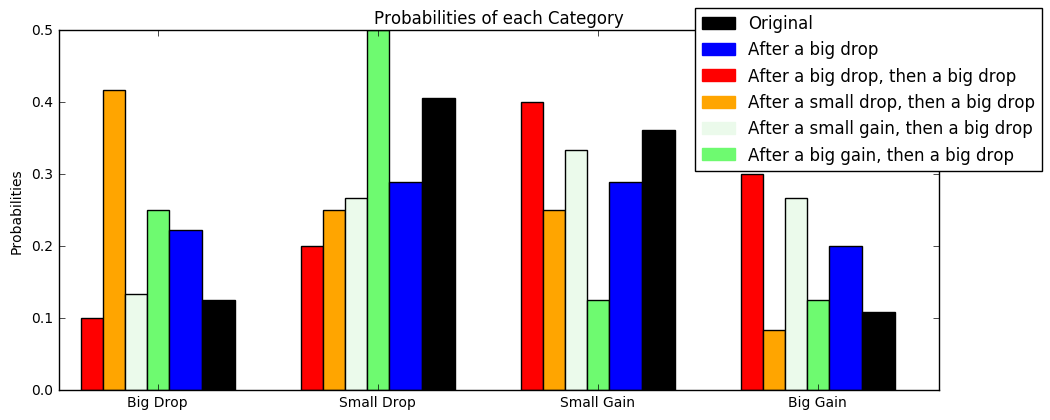

In [23]:
plot_three_day_probability_bar_graph('bd', two_week_trends, three_week_trends)
plt.show()

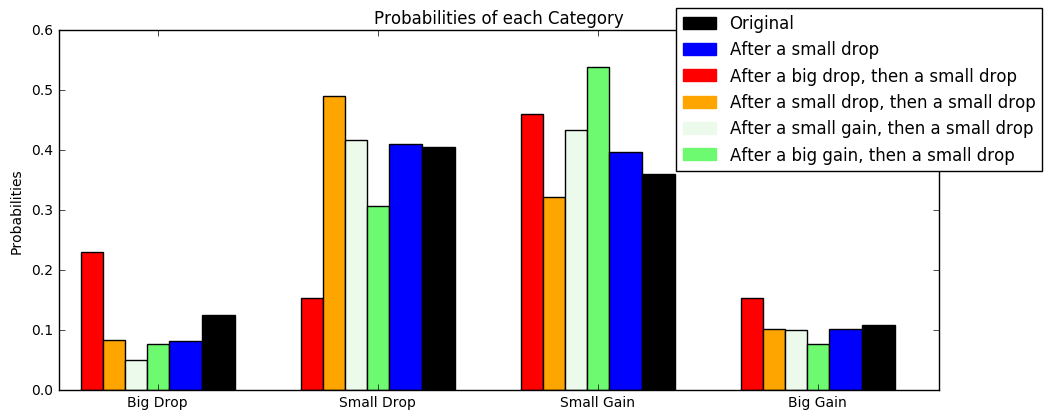

In [24]:
plot_three_day_probability_bar_graph('sd', two_week_trends, three_week_trends)
plt.show()

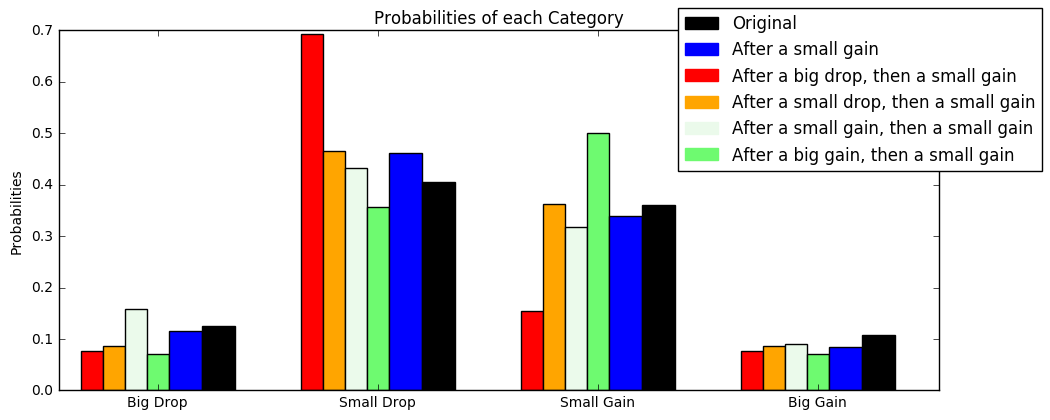

In [25]:
plot_three_day_probability_bar_graph('sg', two_week_trends, three_week_trends)
plt.show()

#### ^^^^^^^^^^^^ That's a really cool one (I wonder how many times that's happened?)

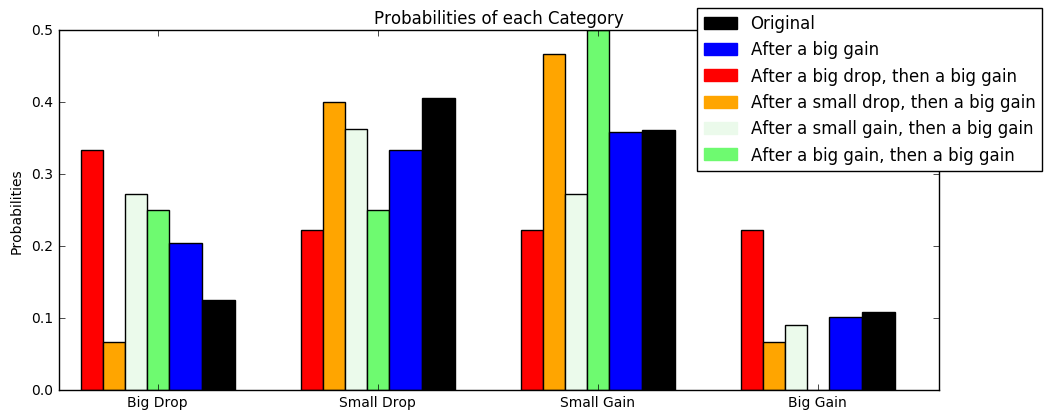

In [27]:
plot_three_day_probability_bar_graph('bg', two_week_trends, three_week_trends)
plt.show()

#### This is also pretty cool. Looks like two weeks of big gains is the max we can expect. It figures things would run outta steam though.

### It should by now be evident looking back an extra week is pretty informative

# SPY

In [29]:
df = pd.DataFrame()
df = df.from_csv('spy.csv')
weekly_movements = get_price_movements(df, period=7)

movement_categories = categorize_movements(weekly_movements, n_cats=4)
category_probabilities = get_category_probabilities(movement_categories)

two_week_trends = get_two_day_trends(movement_categories)
three_week_trends = get_three_day_trends(movement_categories)

#### I can't think of a better name for the get_two_day_trends that generalizes to weeks and months :(

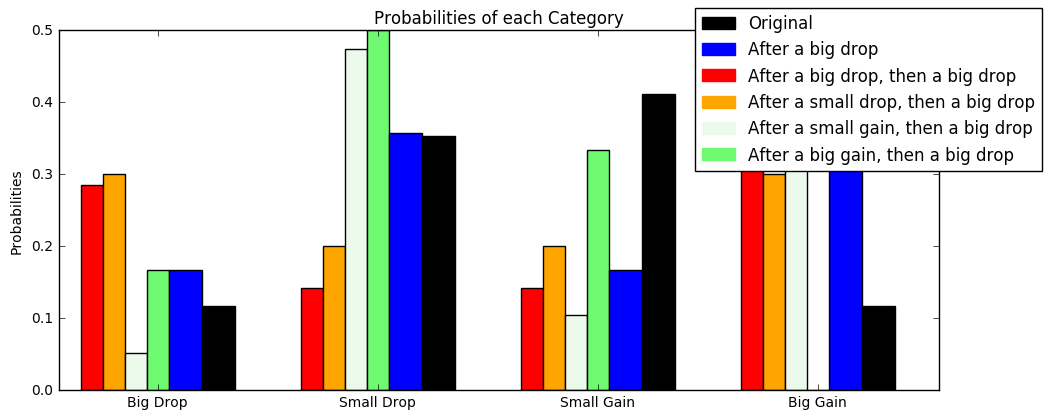

In [31]:
plot_three_day_probability_bar_graph('bd', two_week_trends, three_week_trends)
plt.show()

#### Also mucho interesting. 
When looking at daily movements, big gain big drop big gain is not uncommon. However it doesn't really happen on a weekly level ever for SPY.  
It makes sense though -- this type of bounce would indicate instability and an erratic market.

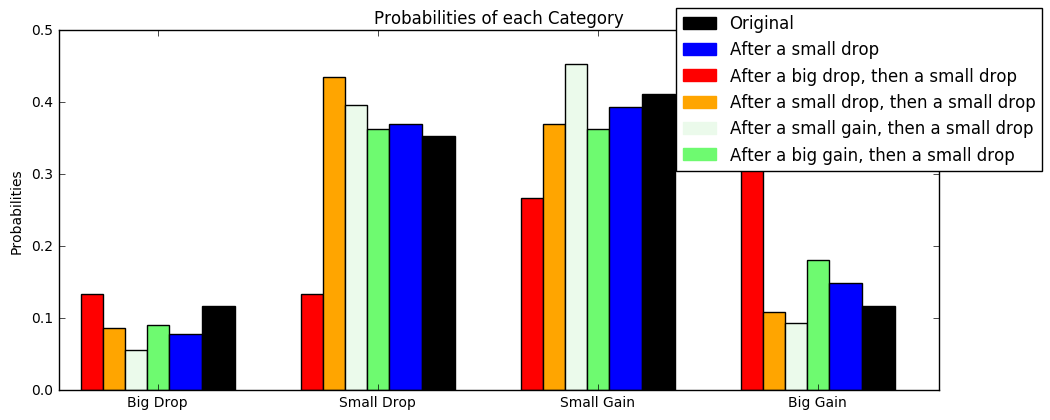

In [32]:
plot_three_day_probability_bar_graph('sd', two_week_trends, three_week_trends)
plt.show()

This is interesting, big drop followed by a small drop is a good time to go in.


Also, just for the simple day to day, buying SPY calls after small gain small drop seems like a good move

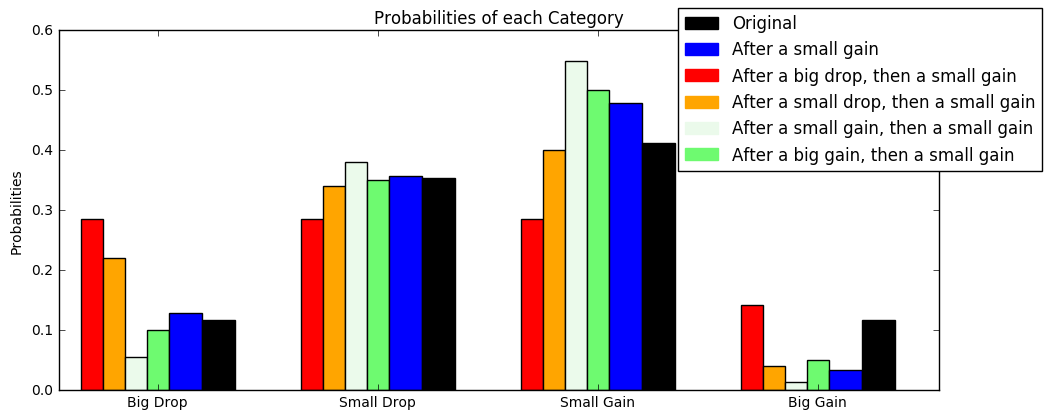

In [33]:
plot_three_day_probability_bar_graph('sg', two_week_trends, three_week_trends)
plt.show()

#### Holy shit! Small gains have stellar momentum!

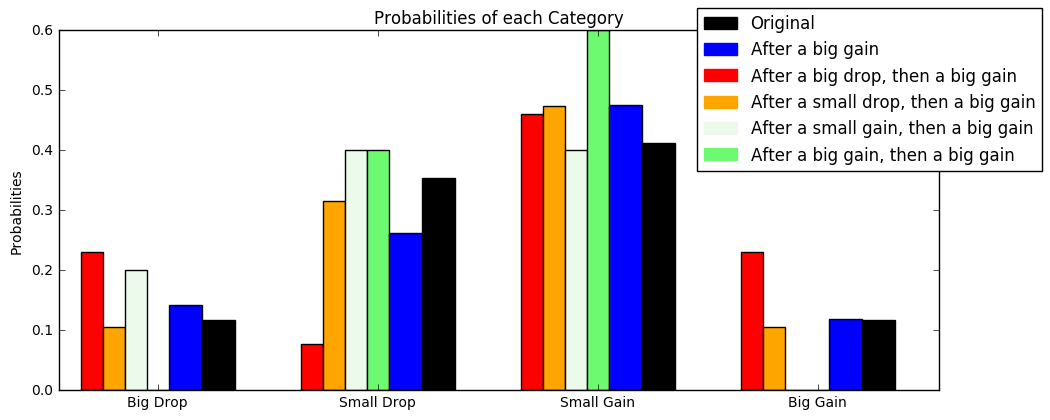

In [34]:
plot_three_day_probability_bar_graph('bg', two_week_trends, three_week_trends)
plt.show()

The evidence is clear here. After two weeks of big gains, sell OTM puts and calls, especially since IV is probably gonna be high

# MU

In [36]:
df = pd.DataFrame()
df = df.from_csv('mu.csv')
weekly_movements = get_price_movements(df, period=7)

movement_categories = categorize_movements(weekly_movements, n_cats=4)
category_probabilities = get_category_probabilities(movement_categories)

two_week_trends = get_two_day_trends(movement_categories)
three_week_trends = get_three_day_trends(movement_categories)

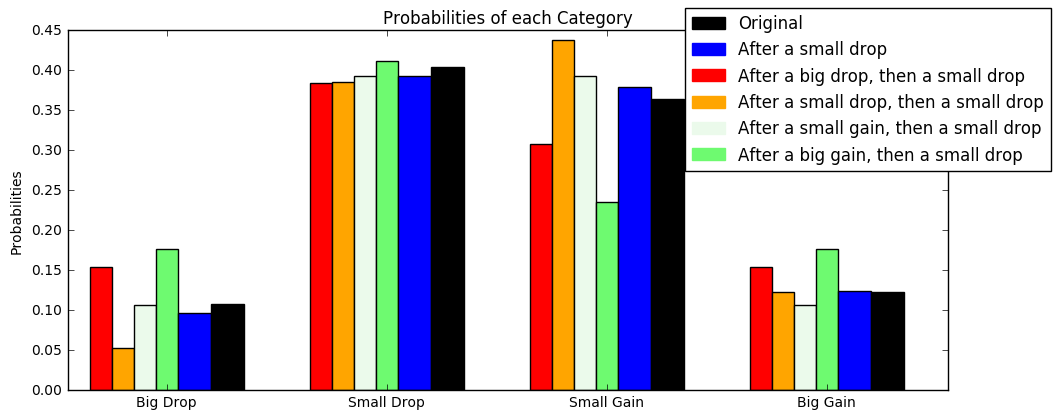

In [39]:
plot_three_day_probability_bar_graph('sd', two_week_trends, three_week_trends)
plt.show()